In [2]:
# importing necessary modules
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading training data
# downward shortwave radiation at surface at station 'ACME: dswrfs'
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME: dlwrfs'
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME: uswrfs'
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME: ulwrfs'
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF\\ulwrf_station.csv", header=None)


# Temperature at surface at station 'ACME: ts'
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME: t'
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME: mint'
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME: maxt'
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Max_temp\\maxt_station.csv", header=None)


# total column-integrated condensate over the entire atmosphere at station 'ACME: tc'
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME: tcc'
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME: h'
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME: pw'
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precipitation\\precip_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Pressure\\pr_station.csv", header=None)


# loading traget dataset
target = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\train.csv")

In [4]:
# prepare the input and target variable
x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr], axis=1)
x.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf', 'ts', 't', 'mint', 'maxt', 'tc', 'tcc', 'h', 'pw', 'precip', 'pr']
#print(x.head())
y0 = target['ACME']
X = x.values
y = y0.values

Model 1: Linear regression
            Test train split on the dataset with a test size of 0.3, traing on 70% data, testing on 30% data
            5 fold cross validation, training on 4 fold data, testing on the hold set.
            Pipeline with scaled data and 5 fold cross validation
Model 2: Gradient Boosting
            Parameter tuning; parameters: number of estimators, depth, learning rate with a 30% test data hold
            pipeline with scaled data, 5 fold cross validation and optimum parameters obtained from previous step
            

In [5]:
# linear regression on all features using test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8273110944532512
Root Mean Squared Error: 3192406.972216405


In [12]:
# linear regression on all features with k-fold cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.77851986 0.84023684 0.85692081 0.84230799 0.81134803]
Average 5-Fold CV Score: 0.8258667070666164


In [13]:
# Scaling the data before modeling: scaling <- 5 fold cross validation
# Setup the pipeline steps: steps
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('linreg', LinearRegression())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.77851986 0.84023684 0.85692081 0.84230799 0.81134803]
Average 5-Fold CV Score: 0.8258667070666139


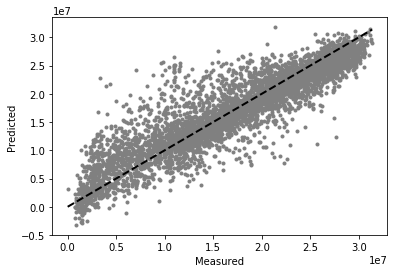

In [14]:
from sklearn.model_selection import cross_val_predict
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(pipeline, X, y, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted, color='gray', marker='.')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


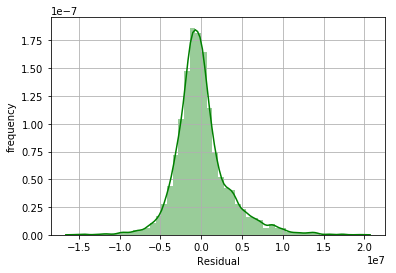

In [15]:
residual = predicted - y
ax = sns.distplot(residual, bins=50, color="g")
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.grid(True)
plt.show()

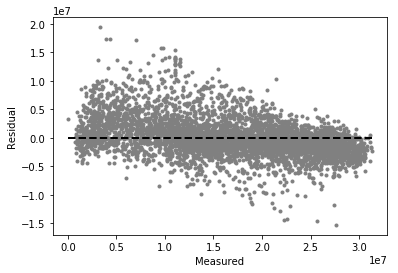

In [16]:
fig, ax = plt.subplots()
ax.scatter(y, residual, marker='.', color='gray')
ax.plot([0, y.max()], [0,0], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Residual')
plt.show()
 

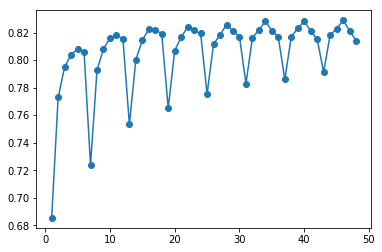

maximum r_sq: 0.8289775976646881


In [18]:
## Gradient Boosting: Hyperparameter  tuning 
from sklearn import ensemble
n_space = np.arange(4,12,1)
depth_space = np.arange(1,7,1)
#learning_space = np.arange(0.1,1,0.2)
r_sq = []
for n in n_space:
    for depth in depth_space:
        #for learning in with optimum learning rate 0.4:
        params = {'n_estimators': n, 'max_depth': depth, 'learning_rate': 0.4, 'criterion': 'mse'}
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        gradient_boosting_regressor.fit(X_train, y_train)
        predicted = gradient_boosting_regressor.predict(X_train)
        residual = predicted - y_train
        r_sq.append(gradient_boosting_regressor.score(X_test, y_test)) 
        #print("R^2: {}".format(gradient_boosting_regressor.score(X_test, y_test)))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        #print('depth, estimator, r^2', depth, n, gradient_boosting_regressor.score(X_test, y_test))
#print("R^2:", r_sq)
x = np.arange(1, len(r_sq)+1)
plt.plot(x, r_sq, marker='o')
plt.show()
print('maximum r_sq:', max(r_sq))

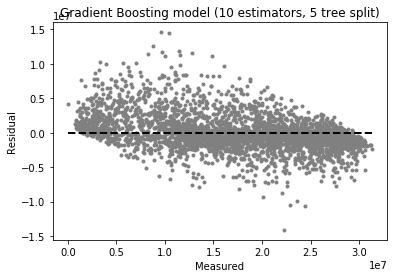

R^2: 0.8215729478750617
Root Mean Squared Error: 3192406.972216405


In [19]:
# Gradient boosting with optimum parameters

params = {
    'n_estimators': 10,
    'max_depth': 5,
    'learning_rate': 0.4,
    'criterion': 'mse'
}
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
predicted = gradient_boosting_regressor.predict(X_train)
residual = predicted - y_train

fig, ax = plt.subplots()
ax.scatter(y_train, residual, marker='.', color='gray')
ax.plot([0, y.max()], [0,0], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Residual')
plt.title('Gradient Boosting model (10 estimators, 5 tree split)')
plt.show()

print("R^2: {}".format(gradient_boosting_regressor.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


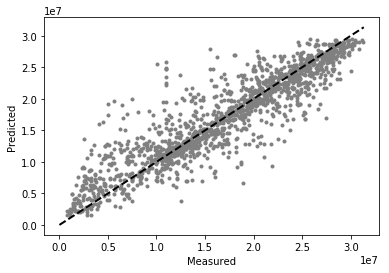

In [20]:
fig, ax = plt.subplots()
ax.scatter(y_test, gradient_boosting_regressor.predict(X_test), color='gray', marker='.')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [21]:
len(r_sq)

48

[0.79397659 0.83977365 0.85465171 0.84531963 0.81540522]
Average 5-Fold CV Score: 0.8298253595090049


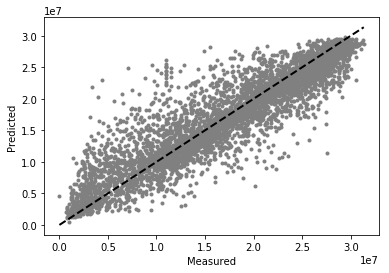

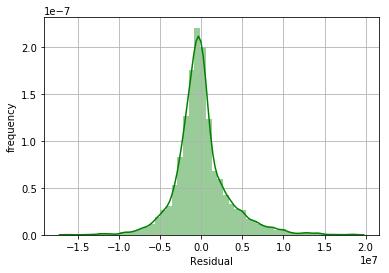

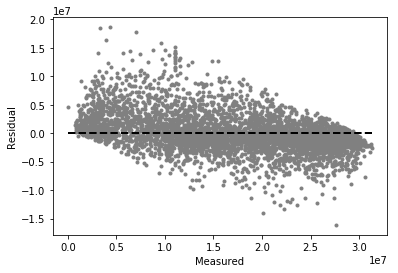

In [22]:
# gradient boosting + 5 fold cross validation
steps = [('scaler', StandardScaler()),
         ('linreg', ensemble.GradientBoostingRegressor(**params))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a linear regression object: reg
#reg = LinearRegression()
params = {
    'n_estimators': 10,
    'max_depth': 5,
    'learning_rate': 0.4,
    'criterion': 'mse'
}
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

predicted = cross_val_predict(pipeline, X, y, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted, color='gray', marker='.')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


residual = predicted - y
ax = sns.distplot(residual, bins=50, color="g")
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.scatter(y, residual, marker='.', color='gray')
ax.plot([0, y.max()], [0,0], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Residual')
plt.show()


In [23]:
# Loading test data
# downward shortwave radiation at surface at station 'ACME: dswrfs'
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME: dlwrfs'
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME: uswrfs'
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME: ulwrfs'
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\ULWRF\\ulwrf_station.csv", header=None)


# Temperature at surface at station 'ACME: ts'
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME: t'
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME: mint'
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME: maxt'
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Max_temp\\maxt_station.csv", header=None)


# total column-integrated condensate over the entire atmosphere at station 'ACME: tc'
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME: tcc'
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME: h'
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME: pw'
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Precipitation\\p_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Pressure\\pr_station.csv", header=None)

x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr], axis=1)
X_test = x.values

#predicted = gradient_boosting_regressor.predict(X_test)

How to do prediction on gradient boosting + 5 fold cross validation model?